In [11]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
# Create database connection
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

# Create sales table
cursor.execute("""
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    product TEXT,
    quantity INTEGER,
    price REAL
)
""")

conn.commit()
print("Database and table created successfully!")

Database and table created successfully!


In [13]:
# Sample data
sample_data = [
    ("Laptop", 5, 50000),
    ("Mouse", 20, 500),
    ("Keyboard", 10, 800),
    ("Laptop", 2, 50000),
    ("Mouse", 15, 500),
    ("Monitor", 3, 12000),
    ("Headphones", 8, 1500),
    ("Keyboard", 7, 800)
]

cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", sample_data)
conn.commit()

print("Sample data inserted!")

Sample data inserted!


In [14]:
query1 = """
SELECT 
    product,
    SUM(quantity) AS total_quantity,
    SUM(quantity * price) AS total_revenue
FROM 
    sales
GROUP BY 
    product
"""

df1 = pd.read_sql_query(query1, conn)
df1

,product,total_quantity,total_revenue
0,Headphones,8,12000.0
1,Keyboard,27,21600.0
2,Laptop,14,700000.0
3,Monitor,6,72000.0
4,Mouse,70,35000.0


In [15]:
query2 = """
SELECT 
    product,
    AVG(price) AS avg_price
FROM 
    sales
GROUP BY 
    product
"""

df2 = pd.read_sql_query(query2, conn)
df2

,product,avg_price
0,Headphones,1500.0
1,Keyboard,800.0
2,Laptop,50000.0
3,Monitor,12000.0
4,Mouse,500.0


In [16]:
query3 = """
SELECT SUM(quantity) AS total_items_sold FROM sales
"""

df3 = pd.read_sql_query(query3, conn)
df3


,total_items_sold
0,125


In [17]:
print("=== SALES SUMMARY (Product-wise) ===\n")
print(df1)

print("\n=== AVERAGE PRICE BY PRODUCT ===\n")
print(df2)

print("\n=== TOTAL ITEMS SOLD (All Products) ===\n")
print(df3)


=== SALES SUMMARY (Product-wise) ===

      product  total_quantity  total_revenue
0  Headphones               8        12000.0
1    Keyboard              27        21600.0
2      Laptop              14       700000.0
3     Monitor               6        72000.0
4       Mouse              70        35000.0

=== AVERAGE PRICE BY PRODUCT ===

      product  avg_price
0  Headphones     1500.0
1    Keyboard      800.0
2      Laptop    50000.0
3     Monitor    12000.0
4       Mouse      500.0

=== TOTAL ITEMS SOLD (All Products) ===

   total_items_sold
0               125


Chart saved as revenue_chart.png


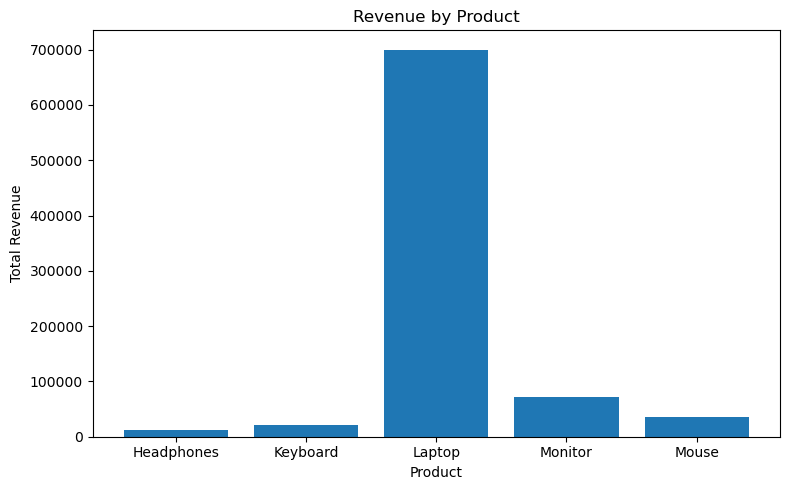

In [24]:
plt.figure(figsize=(8,5))
plt.bar(df1["product"], df1["total_revenue"])
plt.title("Revenue by Product")
plt.xlabel("Product")
plt.ylabel("Total Revenue")
plt.tight_layout()

# Save the chart
plt.savefig("revenue_chart.png")
print("Chart saved as revenue_chart.png")


Chart saved as quantity_chart.png


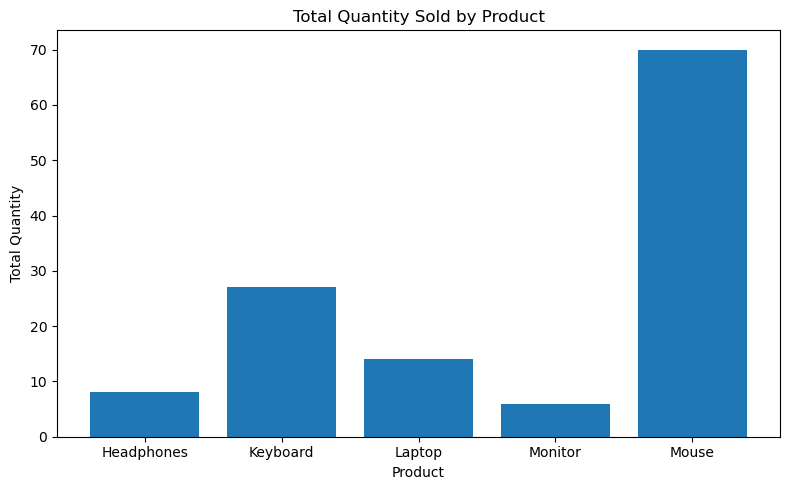

In [29]:
plt.figure(figsize=(8,5))
plt.bar(df1["product"], df1["total_quantity"])
plt.title("Total Quantity Sold by Product")
plt.xlabel("Product")
plt.ylabel("Total Quantity")
plt.tight_layout()

# Save the chart
plt.savefig("quantity_chart.png")
print("Chart saved as quantity_chart.png")